### 3) Initial model fitting step

In [28]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import cross_val_score

**One Hot Encoding for cities**

In [36]:
one_hot_city = pd.get_dummies(data.city, drop_first=True)

In [41]:
lin_city = LinearRegression()


scores = cross_val_score(lin_city, one_hot_city,data['price'], cv=10, scoring = "r2")

print('R2 Score:',scores.mean())

# Could see an explainablity factor of 0.24 which is not bad

R2 Score: 0.24680284130299723


**One Hot Encoding for zipcodes**

In [42]:
one_hot_zip = pd.get_dummies(data.zipcode, drop_first=True)

In [43]:
lin_zip = LinearRegression()

scores = cross_val_score(lin_zip, one_hot_zip,data['price'], cv=10, scoring = "r2")

print('R2 Score:',scores.mean())

# Could see an explainablity factor of 0.39 which is high for a single factor

R2 Score: 0.39500225180190507


**Model Fitting - for attributes that were promising while EDA - Using Cities**

In [44]:
data_test_1 = data[['bedrooms', 'bathrooms', 'sqft_living', 'grade','sqft_living15']].copy()

In [45]:
data_test_1 = pd.concat([data_test_1,one_hot_city],axis = 1)

In [46]:
lin = LinearRegression()


scores = cross_val_score(lin, data_test_1,data['price'], cv=10, scoring = "r2")

print('R2 Score:',scores.mean())

# Could see an explainablity factor of 0.668 which is an increase from the single factor

R2 Score: 0.6686151112067971


**Model Fitting - for attributes that were promising while EDA - Using ZipCodes**

In [50]:
data_test_2 = data[['bedrooms', 'bathrooms', 'sqft_living', 'grade','sqft_living15']].copy()

In [51]:
data_test_2 = pd.concat([data_test_2,one_hot_zip],axis = 1)

In [54]:
lin = LinearRegression()

scores = cross_val_score(lin, data_test_2,data['price'], cv=10, scoring = "r2")

print('R2 Score:',scores.mean())

# Could see an explainablity factor of 0.741 which is an increase from the single factor and outperforming cities

R2 Score: 0.7410181088437457


### 4) Feature engineering

**Transformation**

In [19]:
# Checking for sqft_living15 and sqft_lot15
data_truncated = data[['sqft_living15', 'sqft_lot15']]

In [25]:
# a function is defined to plt a scatter plot
# the inputs are dataframes types
def scatter_plot(data, data_transformed):
    
    col_len = len(data_transformed.columns)
    
    
    row_n = 1
    
    for i in data_transformed.columns:
        
        plt.figure(figsize = (10,5))
        
        plt.subplot(row_n,col_len, 1)
        plt.scatter(x = data[i], y = data['price'])
        
        plt.xlabel('%s'%i)
        plt.ylabel('price')
        plt.title('Original- %s'%i)
        
        plt.subplot(row_n,col_len, 2)
        plt.scatter(x=  data_transformed[i], y = data['price'])
        
        plt.xlabel('%s'%i)
        plt.ylabel('price')
        plt.title('Transformed- %s'%i)          
        
        row_n =+ 1
        
        plt.show()
    
    

**Applying Log Transformation**

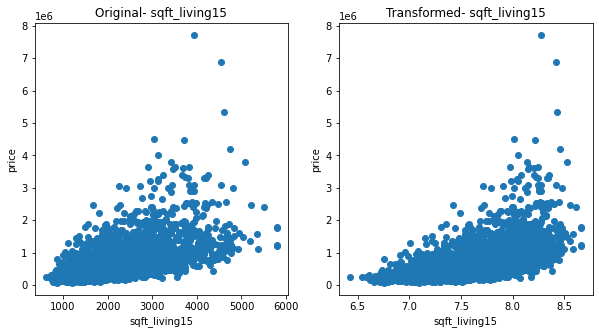

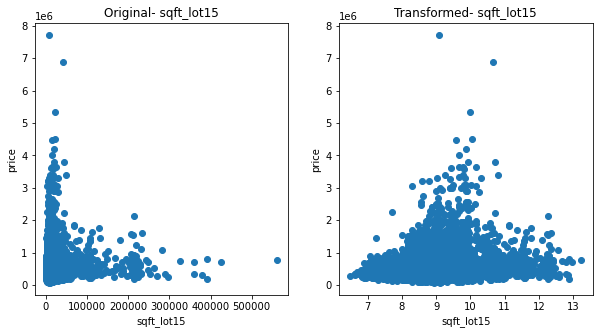

In [76]:
data_truncated_trans = np.log(data_truncated)

scatter_plot(data, data_truncated_trans)

# Could see a more uniform distribution for sqft_lot15 after transformation.

**Applying Cube - Root Transformation**

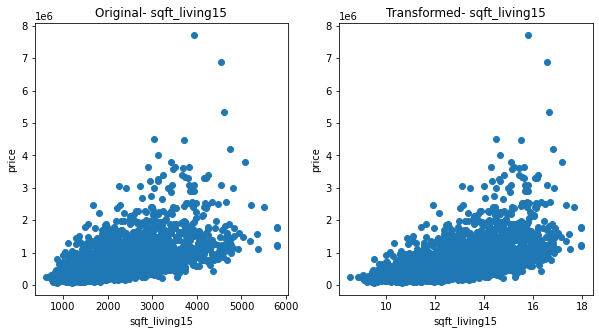

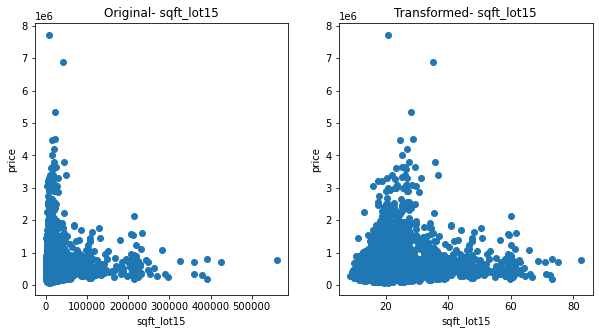

In [77]:
data_truncated_trans = np.cbrt(data_truncated)

scatter_plot(data, data_truncated_trans)

# Could see a more uniform distribution for sqft_lot15 after transformation.

**Applying Square - Root Transformation**

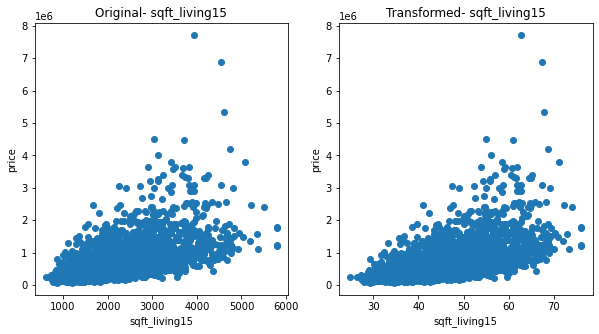

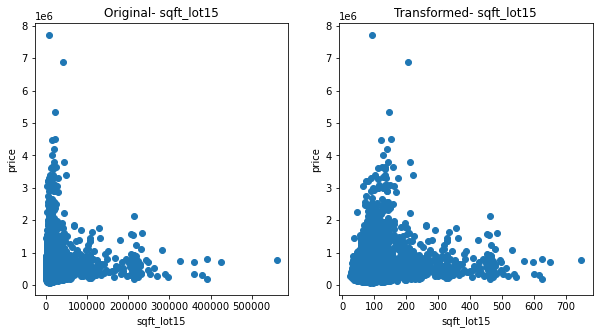

In [78]:
data_truncated_trans = np.sqrt(data_truncated)

scatter_plot(data, data_truncated_trans)

# COuld see a more uniform distribution for sqft_lot15 after transformation.

**Applying power Transformation**

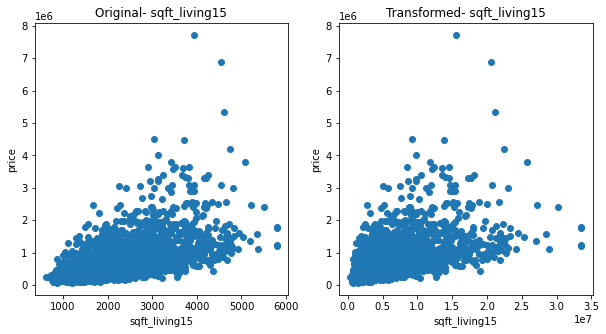

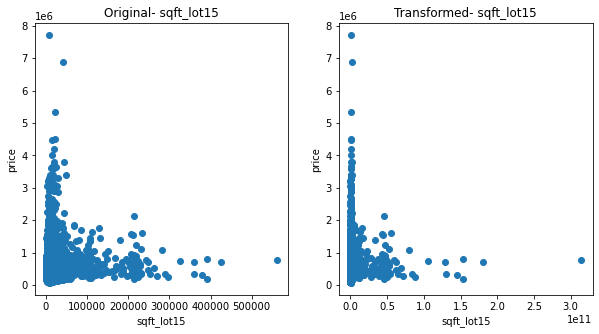

In [79]:
data_truncated_trans = np.power(data_truncated, 2)

scatter_plot(data, data_truncated_trans)

# Could not see an affect on the dribution after transformation.

**Outlier Analysis**

In [80]:
# a function is defined to plot a box plot
# the inputs are dataframes types
def box_plot(data, data_transformed):
    
    col_len = len(data_transformed.columns)
    
    
    row_n = 1
    
    for i in data_transformed.columns:
        
        plt.figure(figsize = (10,5))
        
        plt.subplot(row_n,col_len, 1)
        plt.boxplot(x = data[i])
        
        plt.xlabel('%s'%i)
        plt.title('Original- %s'%i)
        
        plt.subplot(row_n,col_len, 2)
        plt.boxplot(x=  data_transformed[i])
        
        plt.xlabel('%s'%i)
        plt.title('Transformed- %s'%i)  
        
        
        row_n =+ 1
        
        plt.show()
    
    

In [81]:
# a function is defined count the no of outliers before and after transformation
# the inputs are dataframes types
# here z -score logic is used for detecting outliers
def outlier_ana_trans(data, data_transformed):
    
    box_plot(data, data_truncated_trans)
    
    for i in data_transformed.columns:        

        z_t = stats.zscore(data_transformed[i])

        z = stats.zscore(data[i])
        
        print('\nColumn - %s'%i)

        print('Number of Outlier: ',len(z[z>3]))

        print('After Transformation')

        print('Number of Outlier: ',len(z_t[z_t>3]))
        
        

**Applying Log Transformation**

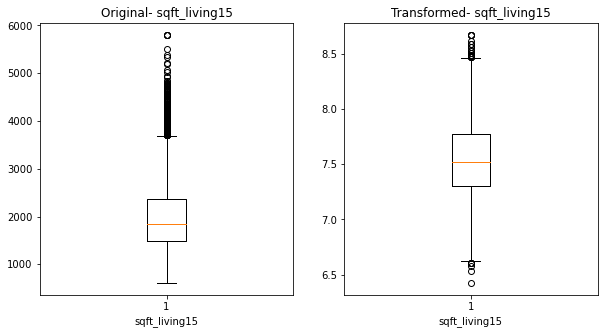

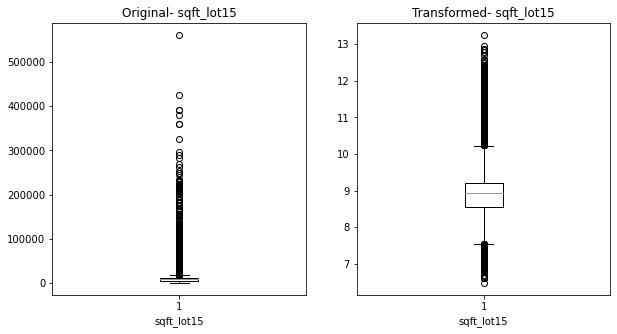


Column - sqft_living15
Number of Outlier:  104
After Transformation
Number of Outlier:  10

Column - sqft_lot15
Number of Outlier:  178
After Transformation
Number of Outlier:  186


In [82]:
data_truncated_trans = np.log(data_truncated)

outlier_ana_trans(data, data_truncated_trans)

**Applying Cube - Root Transformation**

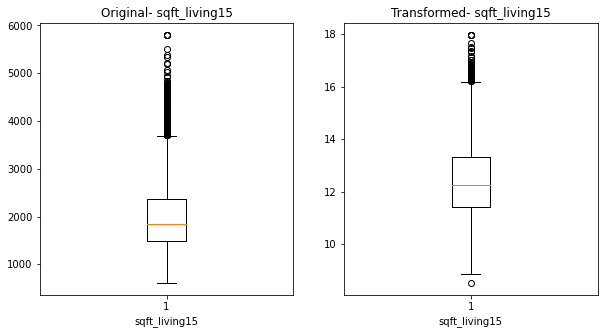

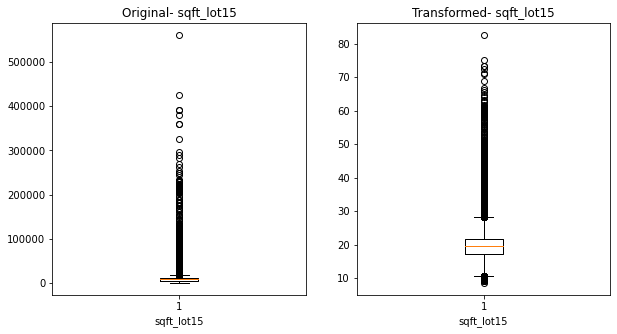


Column - sqft_living15
Number of Outlier:  104
After Transformation
Number of Outlier:  44

Column - sqft_lot15
Number of Outlier:  178
After Transformation
Number of Outlier:  218


In [83]:
data_truncated_trans = np.cbrt(data_truncated)

outlier_ana_trans(data, data_truncated_trans)

**Applying Square - Root Transformation**

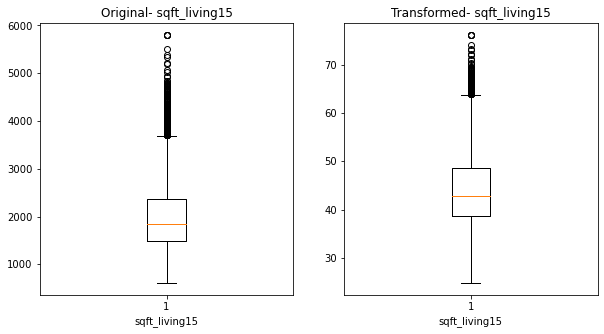

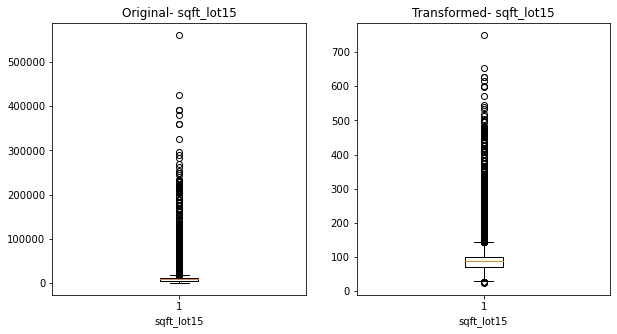


Column - sqft_living15
Number of Outlier:  104
After Transformation
Number of Outlier:  56

Column - sqft_lot15
Number of Outlier:  178
After Transformation
Number of Outlier:  210


In [84]:
data_truncated_trans = np.sqrt(data_truncated)

outlier_ana_trans(data, data_truncated_trans)

**Applying Square - Root Transformation**

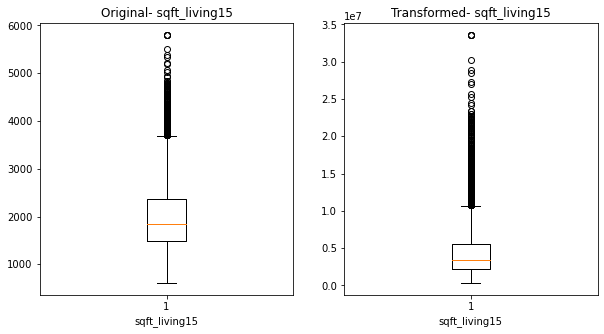

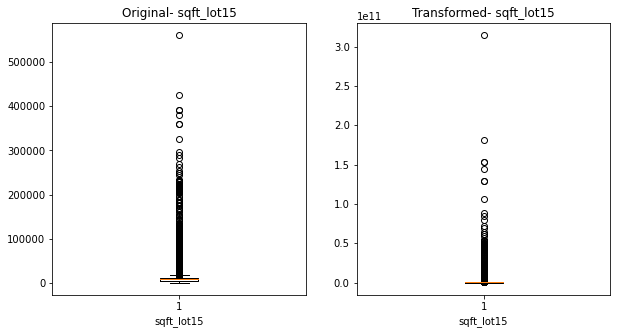


Column - sqft_living15
Number of Outlier:  104
After Transformation
Number of Outlier:  181

Column - sqft_lot15
Number of Outlier:  178
After Transformation
Number of Outlier:  104


In [85]:
data_truncated_trans = np.power(data_truncated,2)

outlier_ana_trans(data, data_truncated_trans)

**To check how the outlier treatment helped the model**

In [131]:
data_test_3 = data[['sqft_living15','sqft_lot15']].copy()

**Applying Power Transformation on sqft_lot15 as it was performing well to remove outliers**

In [149]:
lin = LinearRegression()

data_iter = pd.DataFrame()

data_iter['trans_sqft_lot15'] = np.power(data_test_3['sqft_lot15'],2)


lin.fit(data[['sqft_lot15']],data['price'])

y_pred = lin.predict(data[['sqft_lot15']])


rmse_scores = np.sqrt(mean_squared_error(data['price'],y_pred))

r2_scores = r2_score(data['price'],y_pred)


lin = LinearRegression()

trans_rmse_scores = cross_val_score(lin, data_iter,data['price'],cv=10, scoring = "neg_root_mean_squared_error")
trans_r2_scores = cross_val_score(lin, data_iter,data['price'], cv=10, scoring = "r2")


print('Original')

print('RMSE:',rmse_scores)
print('R2:',r2_scores)


print('\nTransformed')

print('RMSE: ',trans_rmse_scores.mean())
print('R2: ',trans_r2_scores.mean())

# Could see a dip after the transformation

Original
RMSE: 378353.6736613278
R2: 0.00607505846545664

Transformed
RMSE:  -377685.1169043126
R2:  -0.0028893469906117186


**Applying Log Transformation on sqft_living15 as it was performing well to remove outliers**

In [59]:
lin = LinearRegression()

data_iter = pd.DataFrame()

data_iter['trans_sqft_living15'] = np.log(data['sqft_living15'])


lin.fit(data[['sqft_living15']],data['price'])

y_pred = lin.predict(data[['sqft_living15']])


rmse_scores = np.sqrt(mean_squared_error(data['price'],y_pred))
r2_scores = r2_score(data['price'],y_pred)


lin = LinearRegression()

trans_rmse_scores = cross_val_score(lin, data_iter,data['price'],cv=10, scoring = "neg_root_mean_squared_error")
trans_r2_scores = cross_val_score(lin, data_iter,data['price'], cv=10, scoring = "r2")



print('Original')

print('RMSE:',rmse_scores)
print('R2:',r2_scores)


print('\nTransformed')

print('RMSE: ',trans_rmse_scores.mean())
print('R2: ',trans_r2_scores.mean())

# Could see a dip after the transformation

Original
RMSE: 307846.4935476725
R2: 0.34199968567496086

Transformed
RMSE:  -317097.4416162089
R2:  0.29339420787578463


**Applying Radian Transformation on lat,long**

In [30]:
lin = LinearRegression()

data_iter = pd.DataFrame()


data_iter['lat'] = np.radians(data['lat'])
data_iter['long'] = np.radians(data['long'])


lin.fit(data[['lat','long']],data['price'])

y_pred = lin.predict(data[['lat','long']])


rmse_scores = np.sqrt(mean_squared_error(data['price'],y_pred))
r2_scores = r2_score(data['price'],y_pred)


lin = LinearRegression()

trans_rmse_scores = cross_val_score(lin, data_iter,data['price'],cv=10, scoring = "neg_root_mean_squared_error")
trans_r2_scores = cross_val_score(lin, data_iter,data['price'], cv=10, scoring = "r2")



print('Original')

print('RMSE:',rmse_scores)
print('R2:',r2_scores)


print('\nTransformed')

print('RMSE: ',trans_rmse_scores.mean())
print('R2: ',trans_r2_scores.mean())

Original
RMSE: 361292.6563055277
R2: 0.09369172178975094

Transformed
RMSE:  -359508.51565452357
R2:  0.0924483955533297


**Removing Outliers**

In [160]:
data_4 = data[['price','sqft_living15','sqft_lot15']].copy()

In [164]:
z_liv = stats.zscore(data['sqft_living15'])

data_without_outliers = pd.DataFrame()

data_without_outliers = data_4[['price','sqft_living15']][z_liv<3]


lin.fit(data_without_outliers[['sqft_living15']],data_without_outliers['price'])

y_pred = lin.predict(data_without_outliers[['sqft_living15']])


rmse_scores = np.sqrt(mean_squared_error(data_without_outliers['price'],y_pred))
r2_scores = r2_score(data_without_outliers['price'],y_pred)


print('RMSE:',rmse_scores)
print('R2:',r2_scores)

RMSE: 292126.1882469639
R2: 0.30927314415389295


In [165]:
z_lot = stats.zscore(data['sqft_lot15'])

data_without_outliers = pd.DataFrame()

data_without_outliers = data_4[['price','sqft_lot15']][z_lot<3]


lin.fit(data_without_outliers[['sqft_lot15']],data_without_outliers['price'])

y_pred = lin.predict(data_without_outliers[['sqft_lot15']])


rmse_scores = np.sqrt(mean_squared_error(data_without_outliers['price'],y_pred))
r2_scores = r2_score(data_without_outliers['price'],y_pred)


print('RMSE:',rmse_scores)
print('R2:',r2_scores)

RMSE: 375876.5689004177
R2: 0.022956617739891105


In [119]:
data_all = houses[(houses.sqft_living <= 4860) & (houses.sqft_living15 <= 4050) & (houses.bathrooms <= 4.25) ].copy()

In [149]:
data_all = houses[['waterfront','bathrooms', 'sqft_living', 'grade', 'yr_built','view','sqft_living15','zipcode','price']].copy()

In [150]:
test = test_m[['waterfront','bathrooms', 'sqft_living', 'grade', 'yr_built','view','sqft_living15','zipcode','price']].copy()

In [151]:
# one-hot encoding of zipcode
one_hot_zip = pd.get_dummies(data_all.zipcode, drop_first=True)
data_all = pd.concat([data_all,one_hot_zip],axis = 1)

In [152]:
one_hot_zip = pd.get_dummies(test.zipcode, drop_first=True)
test = pd.concat([test,one_hot_zip],axis = 1)

In [129]:
data_all

,bathrooms,bedrooms,sqft_living,grade,zipcode,sqft_living15,price,98002,98003,98004,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,3.00,4,1960,7,98136,1360,604000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.50,4,5420,11,98053,4760,1225000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.00,2,1160,7,98115,1330,468000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.00,3,1430,7,98028,1780,310000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.75,3,1370,7,98074,1370,400000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,2.00,3,1490,8,98144,1400,429000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9757,2.50,4,2520,9,98056,2520,610685.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9758,3.50,4,3510,9,98136,2050,1007500.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9759,0.75,2,1020,7,98144,1020,402101.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
# Prepare x and y data 
X_train = data_all.drop("price",axis=1)
X_train = X_train.drop("zipcode",axis=1)
y_train = data_all["price"]

In [154]:
X_test = test.drop("price",axis=1)
X_test = X_test.drop("zipcode",axis=1)
y_test = test["price"]

In [155]:
# fit the model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics


regressor = LinearRegression()
regressor.fit(X_train, y_train)

cv_scores = []

scores = cross_val_score(regressor, X_train, y_train, cv=10, scoring = "r2")
cv_scores.append(scores.mean())

In [156]:
scores = cross_val_score(regressor, X_train, y_train, cv=10, scoring = "neg_root_mean_squared_error")
cv_scores.append(scores.mean())

In [157]:
cv_scores

[0.7927250786628084, -171833.42606892827]

In [158]:
accuracy = regressor.score(X_test, y_test)

In [160]:
y_pred = regressor.predict(X_test)

In [161]:
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_test,y_pred)
r2

0.8063063998692153

In [162]:
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

rmse

157708.33320583953

In [163]:
# find mape
epsilon = np.finfo(np.float64).eps
mape = np.abs(y_pred - y_test) / np.maximum(np.abs(y_test), epsilon)
output_errors = np.average(mape,
                               weights=None, axis=0)

np.average(output_errors, weights=None)


0.21235489137654054

**5) Model fitting step 2 - Selection**

In [62]:
# import SequentialFeatureSelector from the library for mlxtend.feature_selection for selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import datetime as dt

In [108]:
data_sel = data.copy()

# Converting the date to ordinal value and feeding it into the selection
data_sel['date'] = pd.to_datetime(data_sel['date'])

data_sel['date']=data_sel['date'].map(dt.datetime.toordinal)

# The split is been done
X = data_sel.drop(columns=['price'], axis=1)

y = data_sel['price']

In [73]:
# this function is defined to make use of different selection types like,
# Forward, Backward, Step Wise (Sequence Forward), Sequence Backward
# This function is used for Linear Regression model only
# Here the inputs are the predictor space X , target variable y,
# max_cols - maximum number of columns that are being iterated through
# another feature range_of_cols which can be excerised when we want to use a single column

# Here a line plot is plotted at the end when a range of values are given
# Here a scatter plot is plotted at the end when a single value is given

def selection_mech (X,y, max_cols = 0, range_of_cols = True):
    
    if range_of_cols == False:
        
        range_values = range(max_cols,max_cols+1)
    
    else:
        range_values = range(1,max_cols+1)
     
   # a list of combination are defined along with the selection and color with which it needs to be displayed. 
    sel_comb = [(True,False,'Fro','black'),(True,True,'Seq_Fro','blue'),
                (False,False,'Back','red'),(False,True,'Seq_Back','green')]

    plt.figure()
    
    # a loop is being run for each selection
    for for_flag,flo_flag,selection,color_line in sel_comb:

        list_n_col = []
        list_k_score = []
        
        # a loop is being run through each number of feature
        for i in range_values:
            
            # using forward and floating the selections are altered
            sfs = SFS(LinearRegression(),
                      k_features=i,
                      forward=for_flag,
                      floating=flo_flag,
                      scoring = 'r2',
                      cv = 10)

            sfs.fit(X, y)
            
            # Appending the resultant values
            list_n_col.append(selection)
            list_k_score.append(sfs.k_score_)
        
        # Plotting the values
        if range_of_cols == False:
            
            plt.scatter(list_n_col,list_k_score, label = selection, color = color_line, alpha=0.4)
        
            plt.xticks(ticks= range_values)
        
        else:
            plt.plot(list_n_col,list_k_score, label = selection, color = color_line, alpha=0.4)

        

    plt.legend()    

    plt.show()

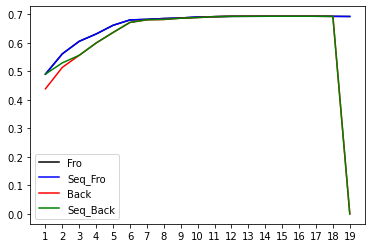

In [240]:
selection_mech(LinearRegression(),X,y,19)

# When the function is invoked, we could see that all the selection at peaking at columns at 6

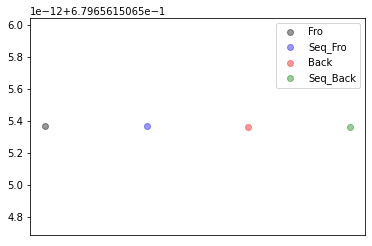

In [107]:
# The function is invoked, for visualizing the peaked value
X = data_sel.drop(columns=['price'], axis=1)

y = data_sel['price']

selection_mech(X,y,6,False)

In [111]:
# Using Forward Selection and 6 features
X = data_sel.drop(columns=['price'], axis=1)

y = data_sel['price']

sfs = SFS(LinearRegression(),
                      k_features=6,
                      forward=True,
                      floating=False,
                      scoring = 'r2',
                      cv = 10)

sfs.fit(X, y)
print('The Selected Features: ',sfs.k_feature_names_)

print('The Final Score: ',sfs.k_score_)

The Selected Features:  ('sqft_living', 'waterfront', 'view', 'grade', 'yr_built', 'lat')
The Final Score:  0.6796561506553641
